In [216]:
import numpy as np
import pandas as pd 
import time
import numpy as np
import tensorflow as tf 
from tensorflow.keras.layers import Dense , Input
import h5py
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from PIL import Image
from scipy import ndimage

from dnn_app_utils_v3 import *
from public_tests import *

In [217]:
df = pd.read_csv('archive/Cancer_Data.csv')
df.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


<Axes: >

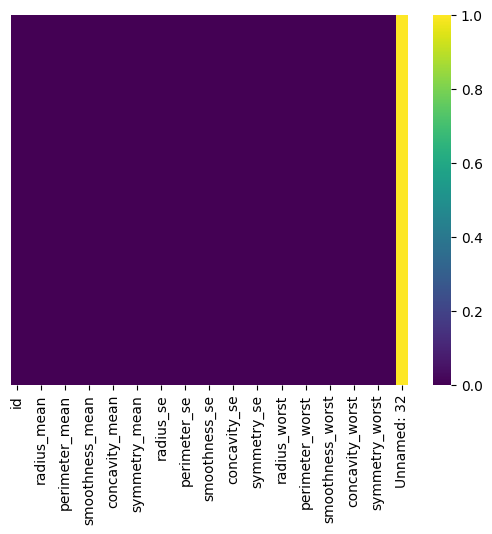

In [218]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [219]:

info_df = pd.DataFrame()
info_df['missing_val'] = df.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100).round().astype(int)
info_df


,missing_val,missing_val_ratio
id,0,0
diagnosis,0,0
radius_mean,0,0
texture_mean,0,0
perimeter_mean,0,0
area_mean,0,0
smoothness_mean,0,0
compactness_mean,0,0
concavity_mean,0,0
concave points_mean,0,0


In [220]:
df.drop(columns=['Unnamed: 32'],inplace=True)

In [221]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [222]:
from sklearn.preprocessing import LabelBinarizer 
label_binarizer = LabelBinarizer()
s = df['diagnosis']
label_binarizer.fit(s) # need to be global or remembered to use it later

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    return label_binarizer.transform(x)  
d = one_hot_encode(s)       
df['label_encoding'] = d

In [223]:
df['label_encoding'].value_counts()

label_encoding
0    357
1    212
Name: count, dtype: int64

In [224]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label_encoding
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [225]:
df.drop(columns=['diagnosis'],inplace=True)

In [226]:
# X_raw = df[['area_se', 'perimeter_se', 'radius_se', 'compactness_worst',
#        'compactness_mean', 'concavity_worst', 'concavity_mean', 'area_mean',
#        'radius_mean', 'area_worst', 'perimeter_mean', 'radius_worst',
#        'concave points_mean', 'perimeter_worst', 'concave points_worst']]
                  
# Define y_raw as the 'diagnosis' column                  
X = df[df.columns[1:-1]]
y = df['label_encoding']
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [227]:
# df['diagnosis']

In [228]:
# output = df['label_encoding']
# df.drop(columns=['label_encoding'],inplace=True)

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.25, random_state=101)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [230]:
X_train.shape

(426, 30)

In [231]:
y_train.shape

(426,)

In [254]:
def plot_training_validation_curves(history):
    epochs = range(1, len(history.history['loss']) + 1)
    
    # Plotting training and validation loss
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

In [282]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [284]:
model = Sequential()
model.add(Dropout(0.2, input_shape=(30,)))
model.add(Dense(units=30, activation='relu')),

model.add(Dense(units=15, activation='relu')),
model.add(Dense(units=1, activation='sigmoid')),
sgd = SGD(learning_rate=0.01, momentum=0.8)
model.compile(loss='binary_crossentropy',
              optimizer=sgd, metrics=['accuracy'])

In [285]:
model.fit(x= X_train,y= y_train,epochs=600,validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 5s 20ms/step - loss: 0.6658 - accuracy: 0.7324 - val_loss: 0.6473 - val_accuracy: 0.7343
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.7653 - val_loss: 0.6116 - val_accuracy: 0.8042
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6043 - accuracy: 0.7512 - val_loss: 0.5759 - val_accuracy: 0.8322
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5688 - accuracy: 0.8263 - val_loss: 0.5358 - val_accuracy: 0.8741
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5306 - accuracy: 0.8380 - val_loss: 0.4949 - val_accuracy: 0.8951
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.8732 - val_loss: 0.4535 - val_accuracy: 0.9021
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4659 - accuracy: 0.8662 - val_loss: 0.4139 - val_accuracy: 0.9441
Epoch 8/600


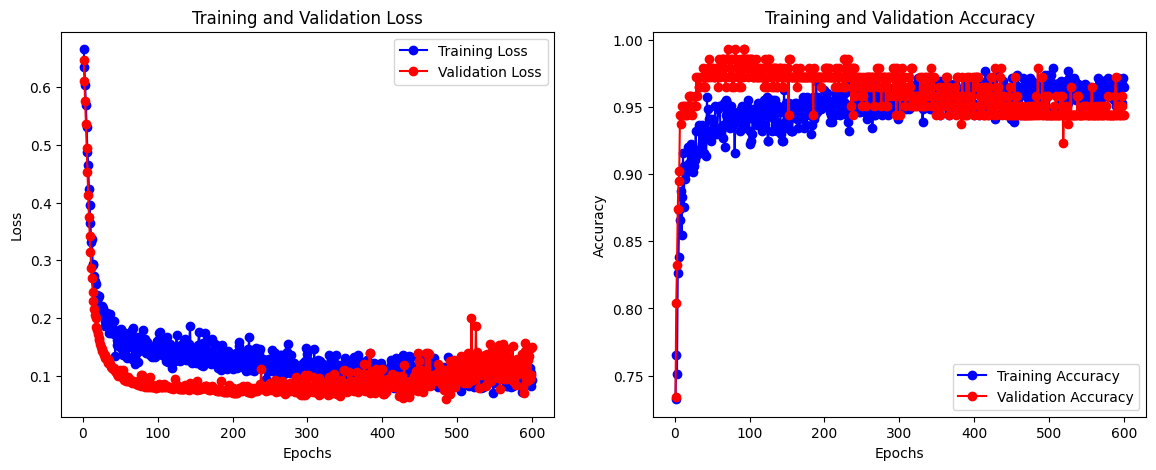

In [286]:
plot_training_validation_curves(model.history)

<Axes: >

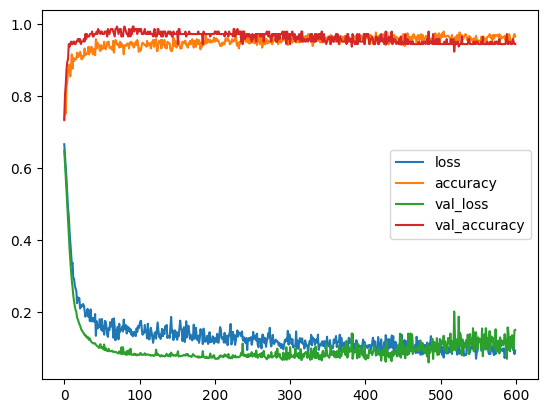

In [287]:
los =  pd.DataFrame(model.history.history)
los.plot()

In [239]:
print(model.history.history['accuracy'])

[0.6502347588539124, 0.8661971688270569, 0.8755868673324585, 0.9178403615951538, 0.908450722694397, 0.9131455421447754, 0.908450722694397, 0.9131455421447754, 0.908450722694397, 0.908450722694397, 0.9107981324195862, 0.9154929518699646, 0.9061033129692078, 0.9178403615951538, 0.9295774698257446, 0.9131455421447754, 0.9272300601005554, 0.9272300601005554, 0.934272289276123, 0.9319248795509338, 0.9413145780563354, 0.9530516266822815, 0.9413145780563354, 0.9436619877815247, 0.9577465057373047, 0.9647887349128723, 0.9647887349128723, 0.9718309640884399, 0.9694835543632507, 0.9624413251876831, 0.9647887349128723, 0.9694835543632507, 0.9718309640884399, 0.9741784334182739, 0.9765258431434631, 0.9741784334182739, 0.9765258431434631, 0.9812206625938416, 0.9812206625938416, 0.9788732528686523, 0.9788732528686523, 0.9765258431434631, 0.9788732528686523, 0.9812206625938416, 0.9812206625938416, 0.9788732528686523, 0.9765258431434631, 0.9812206625938416, 0.9812206625938416, 0.9812206625938416, 0.97

In [240]:
df.head(1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label_encoding
0,842302,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1


In [288]:
d = pd.DataFrame(df.head(1))
bb = df[df['label_encoding']==0]
d.drop(columns=['label_encoding','id'],inplace=True)
bb.head(1)
bb.drop(columns=['id','label_encoding'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\3759865131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb.drop(columns=['id','label_encoding'],inplace=True)


In [290]:
predictions = model.predict(bb)
print((predictions))
b = label_binarizer.inverse_transform(predictions)
print(b)
# predict_x_v2=(model.predict(X_test)>1)
# print(predict_x_v2)

12/12 [==============================] - 0s 952us/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1

In [243]:
layers_dims = [15, 10, 5, 1]
X_train_transposed = X_train.T
y_train_transposed = y_train.values.reshape(1, -1)
X_train_transposed.shape
y_train_transposed.shape

(1, 426)

In [244]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    costs = []  
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X,parameters)
        m = Y.shape[1]
        AL = np.clip(AL, 1e-10, 1 - 1e-10)
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))

        cost = np.squeeze(cost)
    
        grads = L_model_backward(AL,Y,caches)
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [245]:
parameters, costs = L_layer_model(X_train_transposed, y_train_transposed, layers_dims, num_iterations = 2, print_cost = True)

ValueError: shapes (10,15) and (30,426) not aligned: 15 (dim 1) != 30 (dim 0)

NameError: name 'learning_rate' is not defined

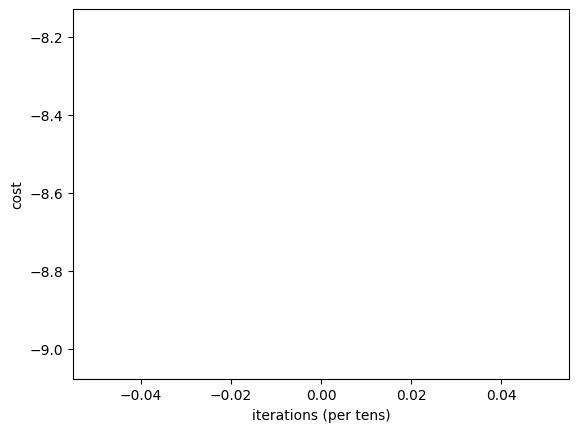

In [ ]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()